## Лабораторна робота 3. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [96]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [98]:
data = get_data(data_path='motorbike_ambulance_calls.csv') #загружать в папку content  
data

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/12,spring,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/12,spring,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/12,spring,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/12,spring,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [99]:
print('Основна статистична інформація по числовим змінним')
data.describe()

Основна статистична інформація по числовим змінним


,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [100]:
print('Розмірність датасету:', data.shape) 
print()
print('Мінімальні значення')
print(data.min()) 
print()
print('Максимальні значення')
print(data.max())


Розмірність датасету: (17379, 15)

Мінімальні значення
index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp              0
hum                0
windspeed          0
cnt                1
dtype: object

Максимальні значення
index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp               1
atemp              1
hum                1
windspeed     0.8507
cnt              977
dtype: object


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [101]:
print('Типи даних')
print(data.dtypes )
print()
print('Кількість')
print(data.count())

Типи даних
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Кількість
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [102]:
print('Кількість пропусків')
data.isna().sum()

Кількість пропусків


index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**

1. В нашому датасеті 17379 рядків та 15 стовпців. Але якщо порахувати скільки повинно бути данних: (365+366)*
24 = 17 544, що 165 рядків менше або на 1%.

 Більшість даних не мають великої розбіжності, бо вони категоріальні або вже віднормовані. Розбіжність є у індексу (це неважливо) та у **кількості викликів** (це наш найголовніший стовпчик).
2. Стовпці index, yr, mnth, hr, holiday, weekday, workingday, weathersit, cnt мають тим данних int64 (тут є індекс і все інше - категорії).
Стовпці temp, atemp, hum, windspeed - float64 (вже відноморвані)
А ось date та season - object (date-потім переробиться у тип дата, season - буде категоріальним)

3. В датасеті немає жодного пропуску, що доволі вражаюче.

**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [103]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
data = tranform_date(data, 'date')


In [104]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")
get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


Ми змінили тип стовбця date на датовий.
Данні надані за період з 1 січня 2011 року по 31 грудня 2012 року (тобто 2 роки), як було і вказано в опису до датасету.


#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [105]:
data_categorical = data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']]
data_categorical

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,spring,0,1,0,0,6,0,1
1,spring,0,1,1,0,6,0,1
2,spring,0,1,2,0,6,0,1
3,spring,0,1,3,0,6,0,1
4,spring,0,1,4,0,6,0,1
...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,0,1,1,2
17375,spring,1,12,20,0,1,1,2
17376,spring,1,12,21,0,1,1,1
17377,spring,1,12,22,0,1,1,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [106]:
data.groupby(['season', 'mnth'])['season'].aggregate('count').unstack()

mnth,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
autumn,NaN,NaN,NaN,NaN,NaN,480.0,1488.0,1475.0,1053.0,NaN,NaN,NaN
spring,1429.0,1341.0,949.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523.0
summer,NaN,NaN,524.0,1437.0,1488.0,960.0,NaN,NaN,NaN,NaN,NaN,NaN
winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384.0,1451.0,1437.0,960.0


Доволі дивно, що осінь вказна с червня по вересень; весна: грудень-березень; літо: березень - червень; зима: вересень - грудень. Тобто пори роки з'їхали назад на одну та чогось накладаються в останньому місяці. 
Але для категорій це неважливо, тому я це запам'ятаю цю особливість для подільших висновків. 

In [107]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = df[season_col_name].replace(['spring', 'summer', 'autumn', 'winter'], [1, 2, 3, 4])
  return df

data_categorical = encode_season(data_categorical, 'season')

data_categorical

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,1,0,1,0,0,6,0,1
1,1,0,1,1,0,6,0,1
2,1,0,1,2,0,6,0,1
3,1,0,1,3,0,6,0,1
4,1,0,1,4,0,6,0,1
...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2
17375,1,1,12,20,0,1,1,2
17376,1,1,12,21,0,1,1,1
17377,1,1,12,22,0,1,1,1


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

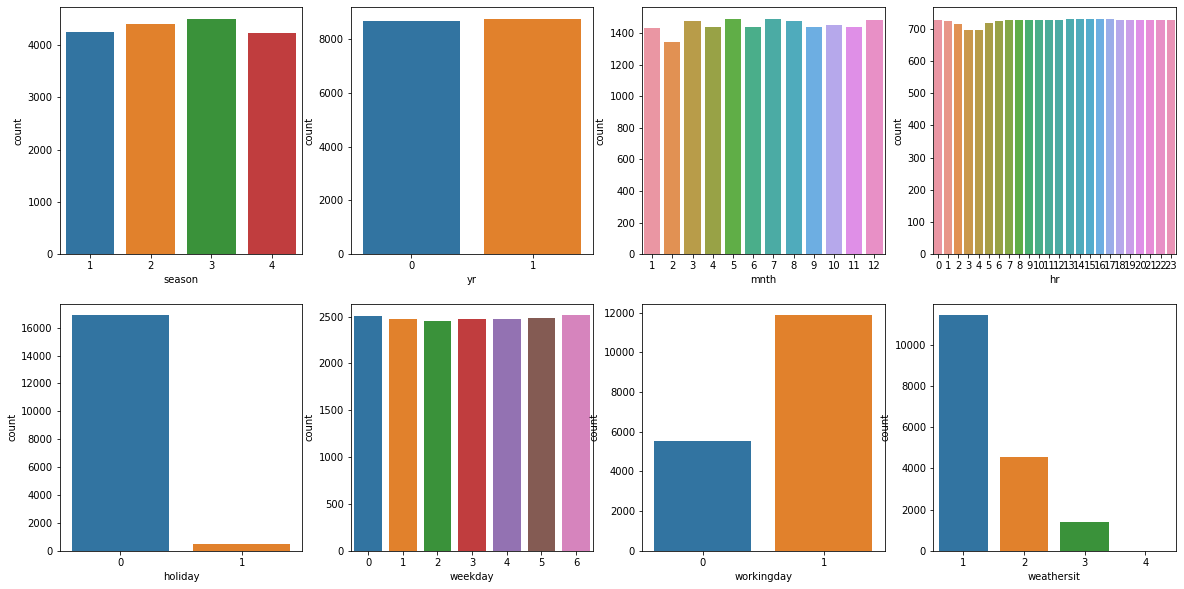

In [108]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x=data_categorical[variable], ax=subplot)

**Висновки з 5-7 завдання (детальні)**

1. Ми віднесли до категоріальних змінних season, yr, mnth, hr, holiday, weekday, workingday, weathersit, бо всі вони мають певний перелік чітко окреслених можливих значень.
2. Замінили строковий тип season на категорії. 1 - spring,2 - summer, 3 - autumn, 4 - winter. 
3. Пободувавши каунтплоти, видно, що роки, пори року, місяці, дні тижня та години розподілень рівномірно. Звісно є якісь нерівності (доволі гарно це видно на 3 та 4 годині ночі в hr - просто недодані дані; 2 місяць в mnth - у лютому 28-29 попри 30-31). 
Великий розбіг у погоді, святкових та робочих днях. Найчастіше була ясна погода, робочий несвятковий день.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [109]:
data_numerical = data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
data_numerical

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0000,16
1,0.22,0.2727,0.80,0.0000,40
2,0.22,0.2727,0.80,0.0000,32
3,0.24,0.2879,0.75,0.0000,13
4,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,119
17375,0.26,0.2576,0.60,0.1642,89
17376,0.26,0.2576,0.60,0.1642,90
17377,0.26,0.2727,0.56,0.1343,61


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

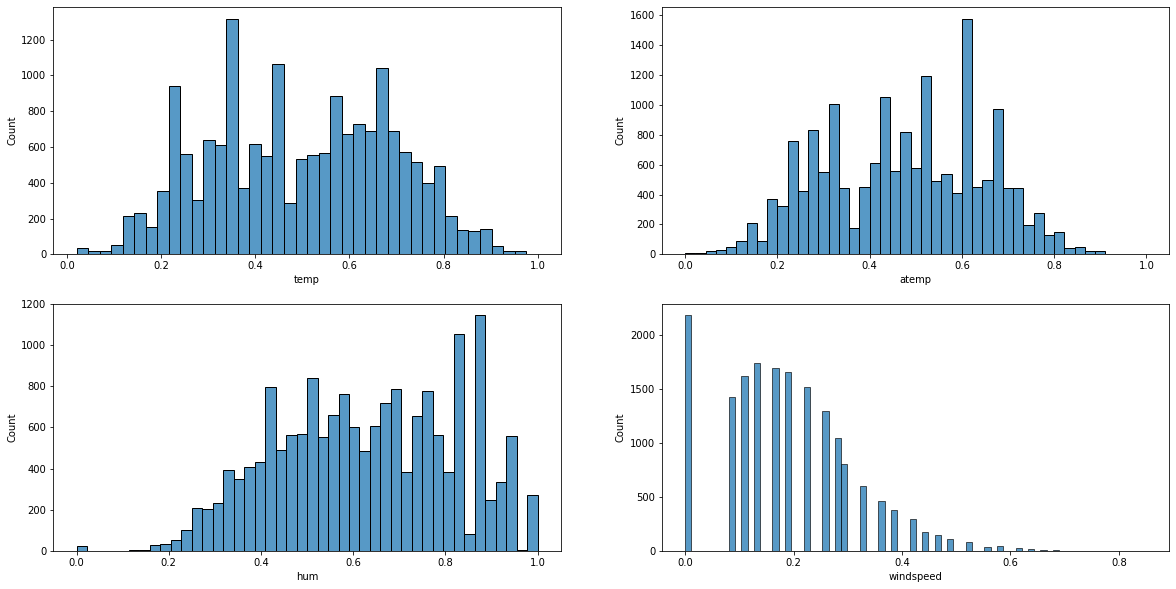

In [110]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(x=data_numerical[variable], ax=subplot) 
  # через те, що у нас лише для 4 змінних є сабплоти, то cnt не малюється 

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Коефіціент нахилу: 1.2774116037490577


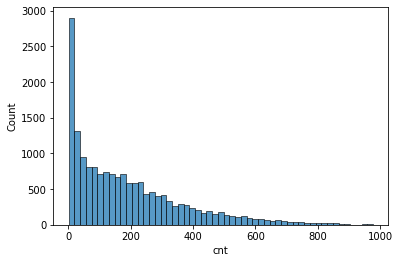

In [111]:
sns.histplot(x=data_numerical['cnt']) 
print('Коефіціент нахилу:', data['cnt'].skew())


**Висновки з 8-10 завдання (детальні)**

1. До числових змін віднесли temp, atemp, hum, windspeed, cnt. Добре, що показники погоди вже віднормовані. 
2. Розподіл температур близький до нормального, але є стрибки чи ями на обох графіках. Вологість теж трохи схожа на нормальний розподіл, але з центром у 0.6. Швидкість вітру має скошений розподіл та великий стопчик 0. 
3. Цільова змінна розподіляється подібно до логарифму при основі меншій 1. Ми маємо великут коефіцієнт нахилу.  Чим менше було викликів, тим частіше вони зустрічались. 

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

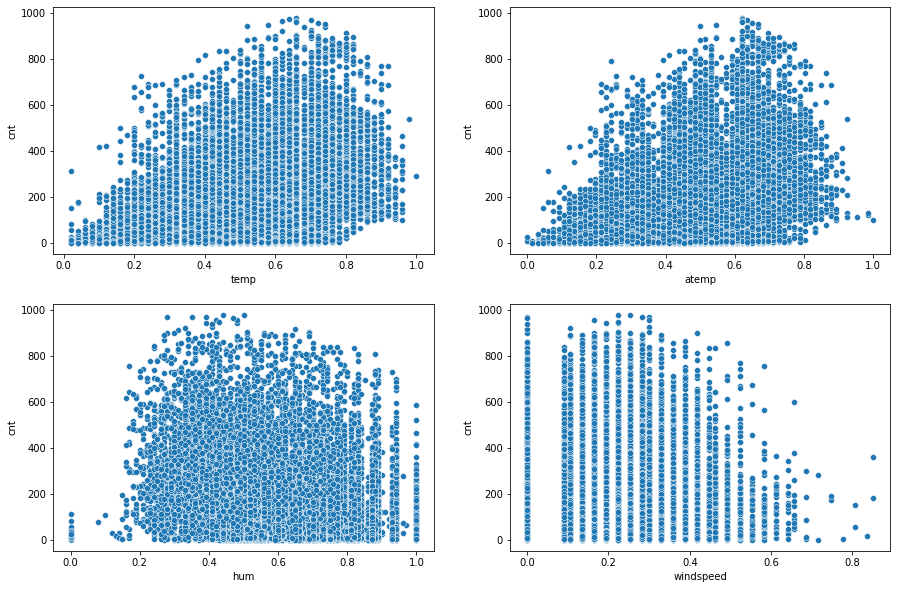

In [112]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(x = data_numerical[var], y=data_numerical['cnt'], ax = subplot)

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

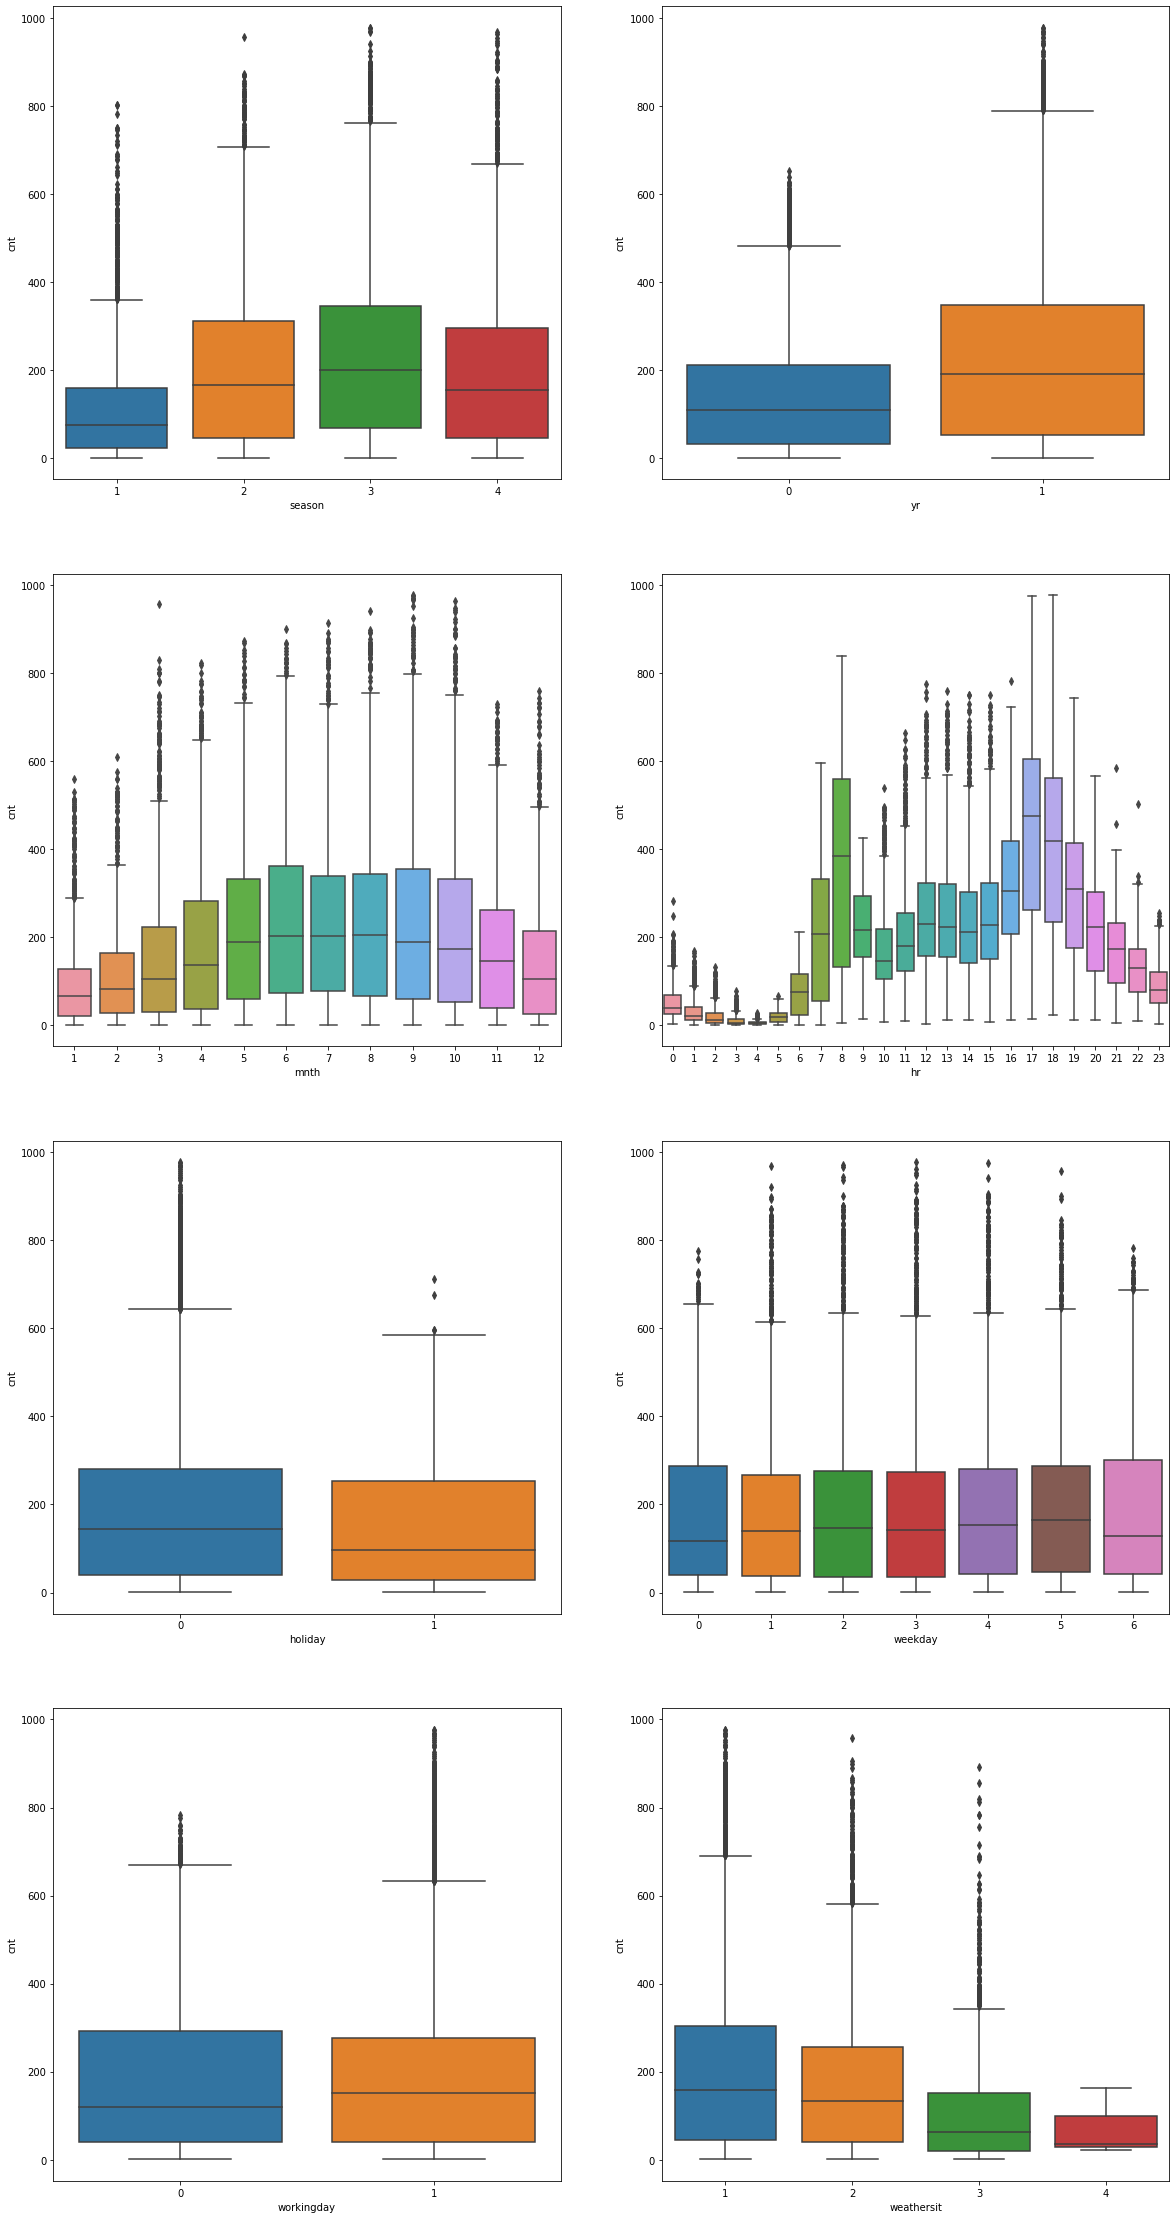

In [113]:
fig, ax = plt.subplots(4, 2, figsize=(20, 40))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x = data_categorical[var], y=data['cnt'], ax=subplot)

**Висновки з 11-12 завдання (детальні)**


11. Розглядаючи скатерплоти, можно побачити схожість з минулими гістограмами. Цікаво, що temp та atemp майже схожі. Вологість на гістограмі була більш напрвлена вправо, а на скатерплоті - вліво (біля 0.4). А ось швидкість вітру менш повільно скошується вправо (тобто чим більша швидкість вітру, тим більша кількість викликів).
12. На боксплотах дуже багато викидів, що було для мене неочікованністю. 
Рівномірний розподіл був лише по дням тижня.
Видно, що кількість викликів більше у теплі місяці та пори року. У 2012 було більше викликів. 
Значення по робочим та святковим днях зрівнялися, але ми пам'ятаємо, що вихідних та свят було значно менше (тому викликів більше по вихідним та святам).
Також різниця між типами погоди стала меншою, тому погана погода збільшує кількість викликів. 
За часами пік надходить на 8 та 17-18 годину, коли час пік на дорогах. Але доволі мало у нічний час викликів, що для мене стало несподіванкою (я мала теорію, що більшість викликів через любительску екстремальну їзду, а це, як правило, відбувається вночі).



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

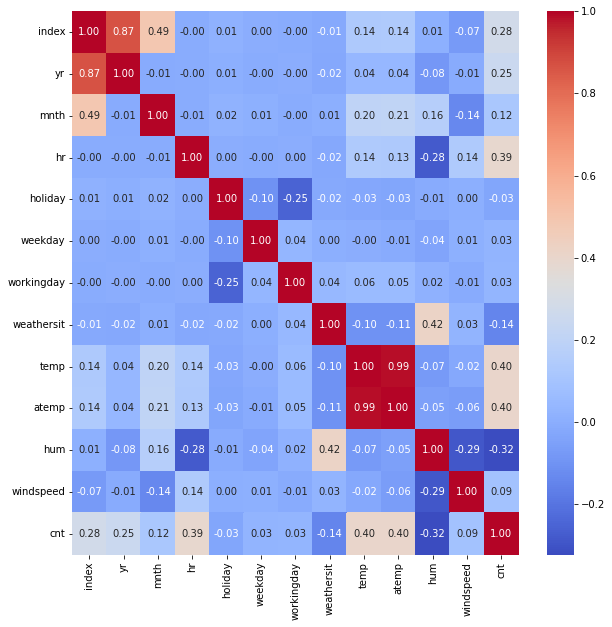

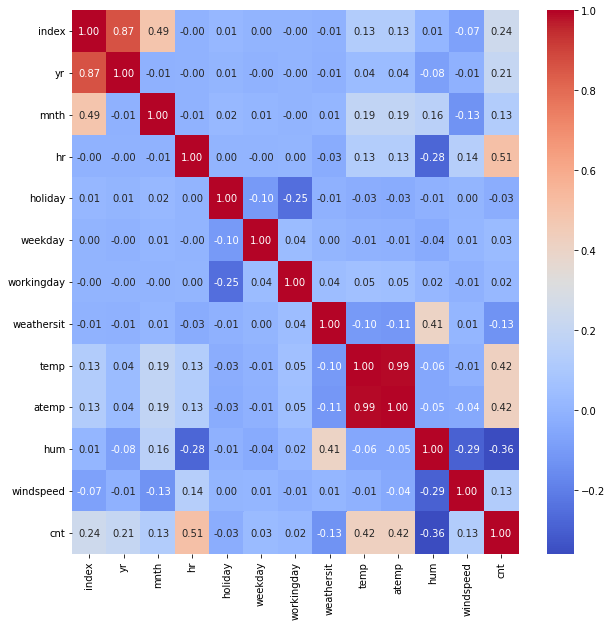

In [114]:
matr1=data.corr(method='pearson') 
plt.figure(figsize=(10, 10))
hm1= sns.heatmap(matr1, cmap="coolwarm", annot=True, fmt='.2f')
matr2=data.corr(method= 'spearman') 
plt.figure(figsize=(10, 10))
hm2= sns.heatmap(matr2, cmap="coolwarm", annot=True, fmt='.2f')

# matr=matr1-matr2
# print(round(matr, 2))

Різниця між коефіцієнтами кореляції в тому, що за Пірсоном дивляться лінійність зінним, а Спірманом монотонність. Але взагалі різниця в нашому випадку майже непомітна. 

Проаналізуємо залежності:

у temp та atemp 0.99 лінійна залежність, бо це два значення температури. Краще видалити atemp

у index з yr та index з mnth 0.87 та 0.49 пов'язанність, що очевидно, бо дані йдуть за часовим порядком

hr з hum та weathersit з hum пов'язані через звичайні погодні зміни

holiday та workingday пов'язані, бо на свята як правило вихідні 

з цільовою змінною (cnt) пов'язані hr, temp(atemp), hum, що було видно на графіках: у час пік більше викликів, чим вища температура та нижча вологість - більше виклків (люди користуються мотоциклами частіше в теплу суху погоду)


**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [115]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                        pd.get_dummies(df['season'], prefix = 'season'), #разбиваємо стовпчик на ще 4 season_autumn	season_spring	season_summer	season_winter
                        pd.get_dummies(df['mnth'], prefix = 'mnth'),
                        pd.get_dummies(df['hr'], prefix='hr'),
                        pd.get_dummies(df['weekday'], prefix = 'weekday'),
                        pd.get_dummies(df['weathersit'], prefix = 'weathersit')
                        ], axis = 1
                         )
    features = features.drop(['season',
                                'mnth', 
                                'weekday', 
                                'weathersit', 
                                ], axis = 1)
    return features

In [116]:
features = get_dummies(data)
features

,index,date,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_autumn,season_spring,season_summer,season_winter,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0000,16,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0000,40,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0000,32,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0000,13,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0000,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,19,0,1,0.26,0.2576,0.60,0.1642,119,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
17375,17376,2012-12-31,1,20,0,1,0.26,0.2576,0.60,0.1642,89,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
17376,17377,2012-12-31,1,21,0,1,0.26,0.2576,0.60,0.1642,90,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
17377,17378,2012-12-31,1,22,0,1,0.26,0.2727,0.56,0.1343,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [117]:
features['night_hours'] = [0 if x>6 and x<21 else 1 for x in features['hr']]
features = features.drop('hr', axis = 1)
features

,index,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_autumn,season_spring,season_summer,season_winter,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,night_hours
0,1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0000,16,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
1,2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0000,40,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0000,32,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0000,13,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
4,5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0000,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,119,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
17375,17376,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,89,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
17376,17377,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,90,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
17377,17378,2012-12-31,1,0,1,0.26,0.2727,0.56,0.1343,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [118]:
features_lr = features.drop(['season_spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date', 'index'], axis = 1)
features_lr

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_autumn,season_summer,season_winter,mnth_1,mnth_2,mnth_3,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4,night_hours
0,0,0,0,0.24,0.81,0.0000,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0.22,0.80,0.0000,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0.22,0.80,0.0000,32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0.24,0.75,0.0000,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0.24,0.75,0.0000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.60,0.1642,119,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
17375,1,0,1,0.26,0.60,0.1642,89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
17376,1,0,1,0.26,0.60,0.1642,90,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
17377,1,0,1,0.26,0.56,0.1343,61,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


Так як ми вже зрозуміли, що  atemp і temp майже однакові, то нам непотрібно тягнути їх обидві і ми видалимо суб'єктивне відчуття температури. 

З стопвця date ми могли б взяти дані про погодні умови (вже є) чи робочі чи святкові дні (це теж є), пору року чи місяць (теж є), але більше ніякої інформації неможиво взяти (число місяця ніяк не доможе). Також видалили index, бо він не несе жодної інформації.

In [119]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis=1) #виділяємо окремо cnt яке і будемо намагатися вгадати
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test #x - усі початкові данні, а у - резуьтат який має бути

In [120]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3) #отсекаем 30% на тренировку

In [121]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [122]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10451.130, test: 10101.350
R^2 train: 0.688, test: 0.680


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

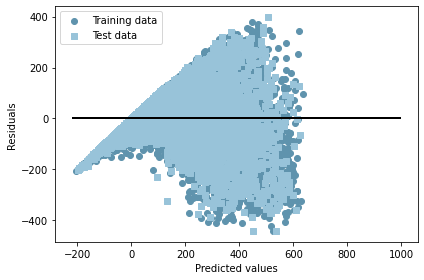

In [123]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()



**Висновки з завдання (детальні)**

Переробивши наші данні для того, щоб не надавати перевагу жодній категорії, ми отримали аж 54 стовпців, що дуже багато і складно візуалізувати. Далі ми розділили вибірку на 70% для навчання та 30% для тесту. Далі була побудована модель лінійної регресії, що навчалась на нашій більшій частині вибірки та тестувалась на меншій. У результаті точність на навчані - 68.8%, на тесті - 68%. Але це дуже мало, лише на 18% більше, ніж підкинути монету.  Якщо поділити вибірку на 80 та 20 відсотків, то точність виросте лише на 0.1%, тому проблема не у кількості даних, а у вибраного методі.
Але з плюсів: легко запрограмувати (в нас був майже весь код), що робить цей метод привабливим для першого початкового прогнозування.

